In [16]:
import os, logging, pickle, logging
# import tensorflow as tf
import numpy as np
import time


In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt

log_file = os.path.abspath("dataprep-vtck-phase2.logs")
logging.basicConfig(
    filename=log_file,
    level=logging.DEBUG,
    format="%(asctime)s:%(levelname)s:%(message)s"
    )
print(f'Log path: {log_file}')

%matplotlib inline

Log path: /datadrive2/dalon/diarization-experiments/Speaker_Verification/Notebooks/data-prep/dataprep-vtck-phase2.logs


# Data selection

Roughly in dev set:

Voxceleb 2</br >
Number of speakers = 5,994

Voxceleb 1</br >
Number of speakers = 1,211

In [18]:
max_batch_utterances = 1000
data_path = "/datadrive2/dalon/diarization-experiments/Speaker_Verification/data/VCTK-Corpus/vctk.b"
save_dir = f"/datadrive2/dalon/diarization-experiments/Speaker_Verification/data/VCTK-Corpus/train-data-pruned-{max_batch_utterances}"

In [4]:
with open(data_path, "rb") as f:
    train_data_paths = pickle.load(f)

In [19]:
train_data_paths[:2]

[['/datadrive2/dalon/diarization-experiments/Speaker_Verification/data/VCTK-Corpus/wav48/p259/p259_384.wav',
  (1528, 40, 50),
  '/datadrive2/dalon/diarization-experiments/Speaker_Verification/data/VCTK-Corpus/cleaned-data/p259.npy'],
 ['/datadrive2/dalon/diarization-experiments/Speaker_Verification/data/VCTK-Corpus/wav48/p315/p315_158.wav',
  (427, 40, 50),
  '/datadrive2/dalon/diarization-experiments/Speaker_Verification/data/VCTK-Corpus/cleaned-data/p315.npy']]

In [6]:
len(train_data_paths)

109

In [7]:
number_of_segments = np.array([x[1][0] for x in train_data_paths])

In [8]:
logging.info(f'Total Number of Speakers: {len(number_of_segments)}')
logging.info(f'Max = {number_of_segments.max()}\nMin = {number_of_segments.min()}\nMean = {number_of_segments.mean()}')

(array([ 1.,  1.,  4.,  8., 18., 37., 19., 11.,  7.,  3.]),
 array([ 427. ,  548.6,  670.2,  791.8,  913.4, 1035. , 1156.6, 1278.2,
        1399.8, 1521.4, 1643. ]),
 <a list of 10 Patch objects>)

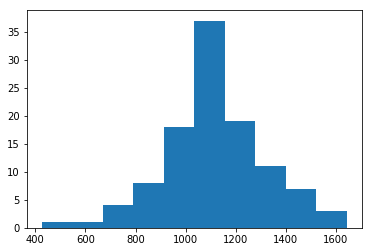

In [9]:
plt.hist(number_of_segments)#[number_of_segments <= 2000])

In [10]:
number_of_segments[number_of_segments == 0]

array([], dtype=int64)

In [20]:
os.makedirs(save_dir)
# read the features
# max_batch_utterances = max_batch_utterances
for idx, entry in enumerate(train_data_paths):
    logging.info(f'Processing: {idx + 1}/{len(number_of_segments)}')
    data = np.load(entry[2])
    if data.shape[0] >= max_batch_utterances:
        data = data[:max_batch_utterances, :, :]
    elif data.shape[0] < max_batch_utterances:
        data = np.pad(data,((0, max_batch_utterances - data.shape[0]), (0, 0), (0, 0)), 'wrap')
    speaker = os.path.basename(entry[2])
    logging.info(f'{data.shape}')
    logging.info(f'Saving: {os.path.join(save_dir, speaker)}')
    np.save(os.path.join(save_dir, speaker), data)
logging.info("Completed!")


In [22]:
data.shape

(1000, 40, 50)

In [25]:
# np.load("/datadrive2/dalon/diarization-experiments/Speaker_Verification/data/VCTK-Corpus/train-data-pruned-1000/p230.npy")[:2]